**Quarta Atividade da Disciplina Gerenciamento de Big Data**

**Discente: Valéria Cristina A R de Figueredo**



**Etapas do Trabalho**

Modulo 1201

Baixar os dados das 10 temporadas da Premier League
https://www.kaggle.com/datasets/somesh24/english-premier-league-football-10-seasons

Crie 3 bucket, para as 3 camadas do Data Lake

1o bucket raw-zone-<NUMEROALEATORIO>

2o bucket cleaned-zone-<NUMEROALEATORIO>

3o bucket curated-zone-<NUMEROALEATORIO>

**Primeiro bucket**

Recebe dados brutos, 1 pasta por arquivo- pode colocar manualmente.

**Segundo bucket**

Deve receber os dados transformados, criando apenas uma tabela para todas as 10 temporadas

Use o serviço de computação que preferir para esse trabalho

DICA: analise cada arquivo individualmente e planeje como irá processá-los.

Isso fará diferença!

Esse bucket deve ser catalogado (gerará 1 tabela no athena)

Nome do dataset para crawler ou para mapeamento manual deve ser "cleaned-zone"
Use parquet como formato de arquivo

Os dados devem ser particionados por equipe visitante e por data da partida

**Terceiro Bucket**

Deve receber e catalogar os quantitativos de gols feitos e sofridos por temporada

1 tabela apenas

A tabela deve conter a seguinte informação: nome do equipe, qual a temporada
quantos gols fez, quantos gols sofreu, quantas partidas aquela temporada teve
qual a média de gols por partida, qual a média de gols por partida dentro de casa, qual a média de gols por partida como visitante.

Use o serviço de computação que preferir para esse trabalho, home do dataset para crawler ou para mapeamento manual deve ser "curated-zone".

use parquet como formato de arquivo

Os dados devem ser particionados por equipe apenas

**Responda às seguintes perguntas com Amazon Athena (Todas para as 10 temporadas):** kgdlç

Qual camada é mais adequada para cada uma das perguntas?
Qual equipe fez mais gols?
Qual equipe sofreu mais gols?
Qual a média de gols por partida do Manchester United?
Qual a média de gols sofridos pelo Liverpool?
Qual é a pior defesa da Premier League ?
Qual é o melhor ataque da Premier League?
Qual é o melhor ataque de cada temporada?

**Desafio (Ponto Extra): Implemente o Fluxo no amazon Step Function**





# **1. Baixar os dados**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving season-0910_csv.csv to season-0910_csv.csv
Saving season-1011_csv.csv to season-1011_csv.csv
Saving season-1112_csv.csv to season-1112_csv.csv
Saving season-1213_csv.csv to season-1213_csv.csv
Saving season-1314_csv.csv to season-1314_csv.csv
Saving season-1415_csv.csv to season-1415_csv.csv
Saving season-1516_csv.csv to season-1516_csv.csv
Saving season-1617_csv.csv to season-1617_csv.csv
Saving season-1718_csv.csv to season-1718_csv.csv
Saving season-1819_csv.csv to season-1819_csv.csv


# **2. Criação de 3 bucket, para as 3 camadas do Data Lake**

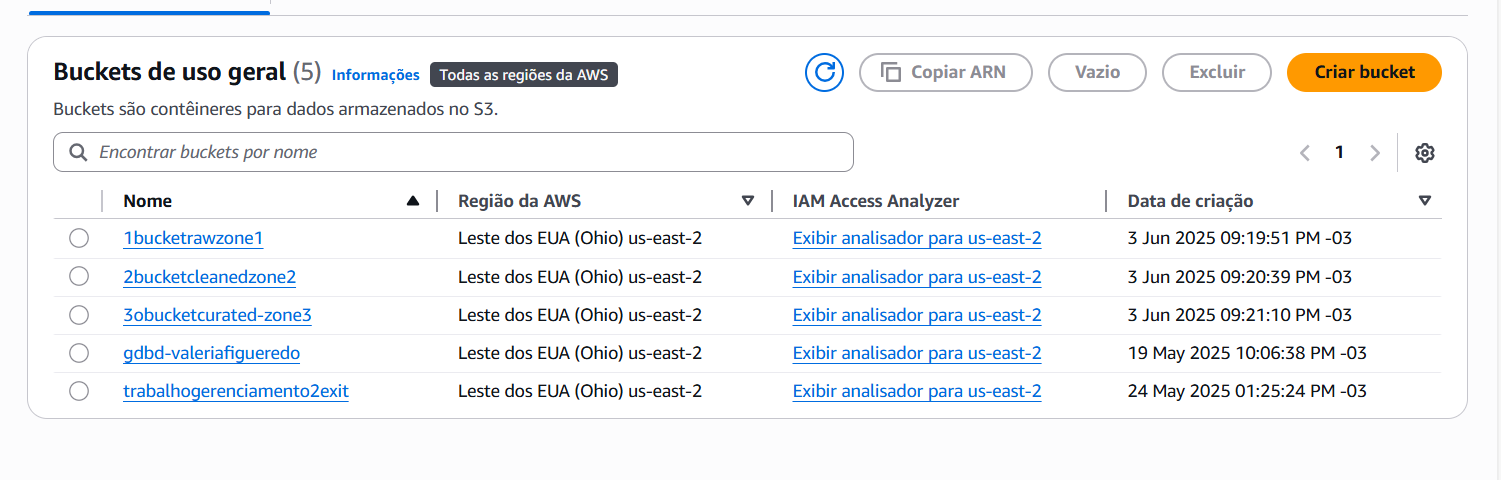

# **3. Primeiro Bucket**

**Objetivo: Receber dados brutos, 1 pasta por arquivo**

In [ ]:
# Separação dos Arquivos por pasta
import os
import zipfile
from pathlib import Path
import shutil

# Caminho base
base_dir = Path("arquivos_organizados")
base_dir.mkdir(exist_ok=True)

# Organiza os arquivos
for file_name in uploaded.keys():
    folder_name = file_name.split("_")[0]  # Ex: 'season-0910'
    folder_path = base_dir / folder_name
    folder_path.mkdir(parents=True, exist_ok=True)

    # Move o arquivo para a pasta correspondente
    shutil.move(file_name, folder_path / file_name)

# Compacta em um ZIP
zip_filename = "temporada_arquivos_organizados.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in base_dir.rglob("*"):
        if file.is_file():
            zipf.write(file, file.relative_to(base_dir))

# Disponibiliza o ZIP para download
from google.colab import files
files.download(zip_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

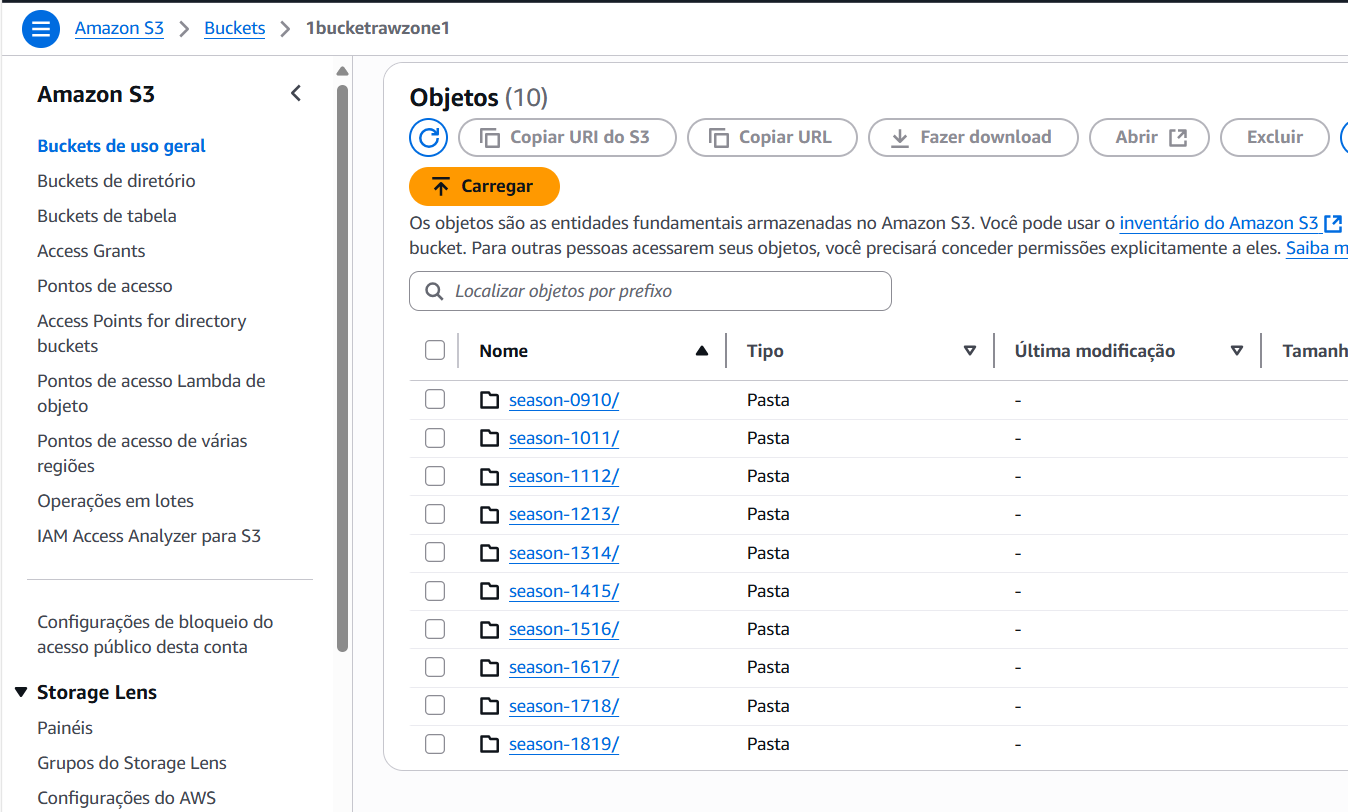

# **4. Segundo Bucket**

**Analise cada arquivo individualmente e planeje como irá processá-los.**

In [ ]:
import pandas as pd

# Leitura do CSV
df = pd.read_csv('season-0910_csv.csv')

# Visualizar as primeiras linhas
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,...,2.04,1.92,1.91,1.81,21,0.0,1.28,1.22,4.40,3.99
1,E0,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,...,2.15,2.04,1.78,1.71,24,0.0,2.58,2.38,1.60,1.54
2,E0,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,...,2.25,2.12,1.70,1.66,23,0.0,1.68,1.61,2.33,2.23
3,E0,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,...,1.67,1.58,2.44,2.26,22,0.0,1.03,1.02,17.05,12.96
4,E0,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,...,2.20,2.06,1.77,1.70,24,0.0,2.27,2.20,1.73,1.63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 71 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

**Análise Comparativa dos Arquivos**

In [ ]:
# Colunas Comuns a Todos os arquivos

import pandas as pd

# Lista de arquivos CSV
arquivos = [
    'season-0910_csv.csv',
    'season-1011_csv.csv',
    'season-1112_csv.csv',
    'season-1213_csv.csv',
    'season-1314_csv.csv',
    'season-1415_csv.csv',
    'season-1516_csv.csv',
    'season-1617_csv.csv',
    'season-1718_csv.csv',
    'season-1819_csv.csv'
]

# Dicionário para armazenar as colunas de cada arquivo
colunas_por_arquivo = {}

# Lê somente os cabeçalhos de cada arquivo
for arquivo in arquivos:
    df = pd.read_csv(arquivo, nrows=0)
    colunas_por_arquivo[arquivo] = set(df.columns)

# Interseção: colunas que estão em todos os arquivos
colunas_comuns = set.intersection(*colunas_por_arquivo.values())

# Exibe o resultado
print(f"\n✅ Colunas comuns a TODOS os arquivos ({len(colunas_comuns)} colunas):\n")
for coluna in sorted(colunas_comuns):
    print(f"- {coluna}")



✅ Colunas comuns a TODOS os arquivos (56 colunas):

- AC
- AF
- AR
- AS
- AST
- AY
- AwayTeam
- B365A
- B365D
- B365H
- BWA
- BWD
- BWH
- Bb1X2
- BbAH
- BbAHh
- BbAv<2.5
- BbAv>2.5
- BbAvA
- BbAvAHA
- BbAvAHH
- BbAvD
- BbAvH
- BbMx<2.5
- BbMx>2.5
- BbMxA
- BbMxAHA
- BbMxAHH
- BbMxD
- BbMxH
- BbOU
- Date
- Div
- FTAG
- FTHG
- FTR
- HC
- HF
- HR
- HS
- HST
- HTAG
- HTHG
- HTR
- HY
- HomeTeam
- IWA
- IWD
- IWH
- Referee
- VCA
- VCD
- VCH
- WHA
- WHD
- WHH


In [ ]:
# Colunas que não apareceram em todos os datasets
import pandas as pd

# Lista com os nomes dos arquivos
arquivos = [
    'season-0910_csv.csv',
    'season-1011_csv.csv',
    'season-1112_csv.csv',
    'season-1213_csv.csv',
    'season-1314_csv.csv',
    'season-1415_csv.csv',
    'season-1516_csv.csv',
    'season-1617_csv.csv',
    'season-1718_csv.csv',
    'season-1819_csv.csv'
]

# Dicionário para armazenar colunas por temporada
colunas_por_arquivo = {}

# Lê apenas o cabeçalho de cada arquivo
for arquivo in arquivos:
    df = pd.read_csv(arquivo, nrows=0)
    colunas_por_arquivo[arquivo] = set(df.columns)

# Exibe colunas de cada arquivo
for nome, colunas in colunas_por_arquivo.items():
    print(f"\n📁 {nome} ({len(colunas)} colunas):")
    print(sorted(colunas))

# Análise comparativa:
print("\n Diferenças entre colunas:")

# Todas as colunas únicas
todas_colunas = set.union(*colunas_por_arquivo.values())

# Tabela de presença/ausência de colunas
tabela = pd.DataFrame(index=sorted(todas_colunas))

for nome, colunas in colunas_por_arquivo.items():
    temporada = nome.split('_')[0]
    tabela[temporada] = tabela.index.isin(colunas)

# Exibir colunas que não estão presentes em todos os arquivos
diferencas = tabela.loc[~tabela.all(axis=1)]

print("\n🧩 Colunas que não aparecem em todos os arquivos:")
display(diferencas)



📁 season-0910_csv.csv (71 colunas):
['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D', 'B365H', 'BSA', 'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH', 'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD', 'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD', 'BbMxH', 'BbOU', 'Date', 'Div', 'FTAG', 'FTHG', 'FTR', 'GBA', 'GBD', 'GBH', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HTR', 'HY', 'HomeTeam', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH', 'Referee', 'SBA', 'SBD', 'SBH', 'SJA', 'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA', 'WHD', 'WHH']

📁 season-1011_csv.csv (71 colunas):
['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D', 'B365H', 'BSA', 'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH', 'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD', 'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD', 'BbMxH', 'BbOU', 'Date', 'Div', 'FTAG', 'FTHG', 'FTR', 'GBA', 'GBD', 'GBH', '

,season-0910,season-1011,season-1112,season-1213,season-1314,season-1415,season-1516,season-1617,season-1718,season-1819
BSA,True,True,True,True,False,False,False,False,False,False
BSD,True,True,True,True,False,False,False,False,False,False
BSH,True,True,True,True,False,False,False,False,False,False
GBA,True,True,True,True,False,False,False,False,False,False
GBD,True,True,True,True,False,False,False,False,False,False
GBH,True,True,True,True,False,False,False,False,False,False
LBA,True,True,True,True,True,True,True,True,True,False
LBD,True,True,True,True,True,True,True,True,True,False
LBH,True,True,True,True,True,True,True,True,True,False
PSA,False,False,False,True,True,True,True,True,True,True


**Processamento dos dados**

In [ ]:
import pandas as pd
import os

# Lista de arquivos CSV
arquivos = [
    'season-0910_csv.csv',
    'season-1011_csv.csv',
    'season-1112_csv.csv',
    'season-1213_csv.csv',
    'season-1314_csv.csv',
    'season-1415_csv.csv',
    'season-1516_csv.csv',
    'season-1617_csv.csv',
    'season-1718_csv.csv',
    'season-1819_csv.csv'
]

# Pasta de saída para arquivos parquet
output_dir = "parquet_particionado"
os.makedirs(output_dir, exist_ok=True)

# Loop de processamento por arquivo
for arquivo in arquivos:
    df = pd.read_csv(arquivo)

    # Manter somente as colunas relevantes
    df = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]

    # Converter coluna de data
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

    # Nome base do arquivo (sem extensão)
    nome_base = os.path.splitext(arquivo)[0]
    output_path = os.path.join(output_dir, nome_base)

    # Criar pasta se não existir
    os.makedirs(output_path, exist_ok=True)

    # Salvar como parquet, particionado por AwayTeam e Date
    df.to_parquet(
        output_path,
        index=False,
        partition_cols=['AwayTeam', 'Date']
    )

print("✅ Arquivos processados e salvos como Parquet particionado em:", output_dir)


<ipython-input-19-15e10604d974>:30: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-19-15e10604d974>:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-19-15e10604d974>:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-19-15e10604d974>:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure

✅ Arquivos processados e salvos como Parquet particionado em: parquet_particionado


In [ ]:
import shutil

# Compactar a pasta inteira em um arquivo zip
shutil.make_archive("parquet_particionado", 'zip', "parquet_particionado")

# Permitir download
from google.colab import files
files.download("parquet_particionado.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# verificação dos dados

import pandas as pd

# Caminho exemplo (ajuste conforme resultado do passo 1)
exemplo_caminho = '/content/parquet_particionado/season-0910_csv/AwayTeam=Arsenal/Date=2009-08-15%2000%3A00%3A00.000000000'
exemplo_caminho2 = '/content/parquet_particionado/season-0910_csv'

# Ler arquivo Parquet
df_exemplo = pd.read_parquet(exemplo_caminho)
df_exemplo.head()
df_exemplo2 = pd.read_parquet(exemplo_caminho2)
df_exemplo2.head()

,HomeTeam,FTHG,FTAG,AwayTeam,Date
0,Everton,1,6,Arsenal,2009-08-15 00:00:00.000000000
1,Man United,2,1,Arsenal,2009-08-29 00:00:00.000000000
2,Man City,4,2,Arsenal,2009-09-12 00:00:00.000000000
3,Fulham,0,1,Arsenal,2009-09-26 00:00:00.000000000
4,West Ham,2,2,Arsenal,2009-10-25 00:00:00.000000000


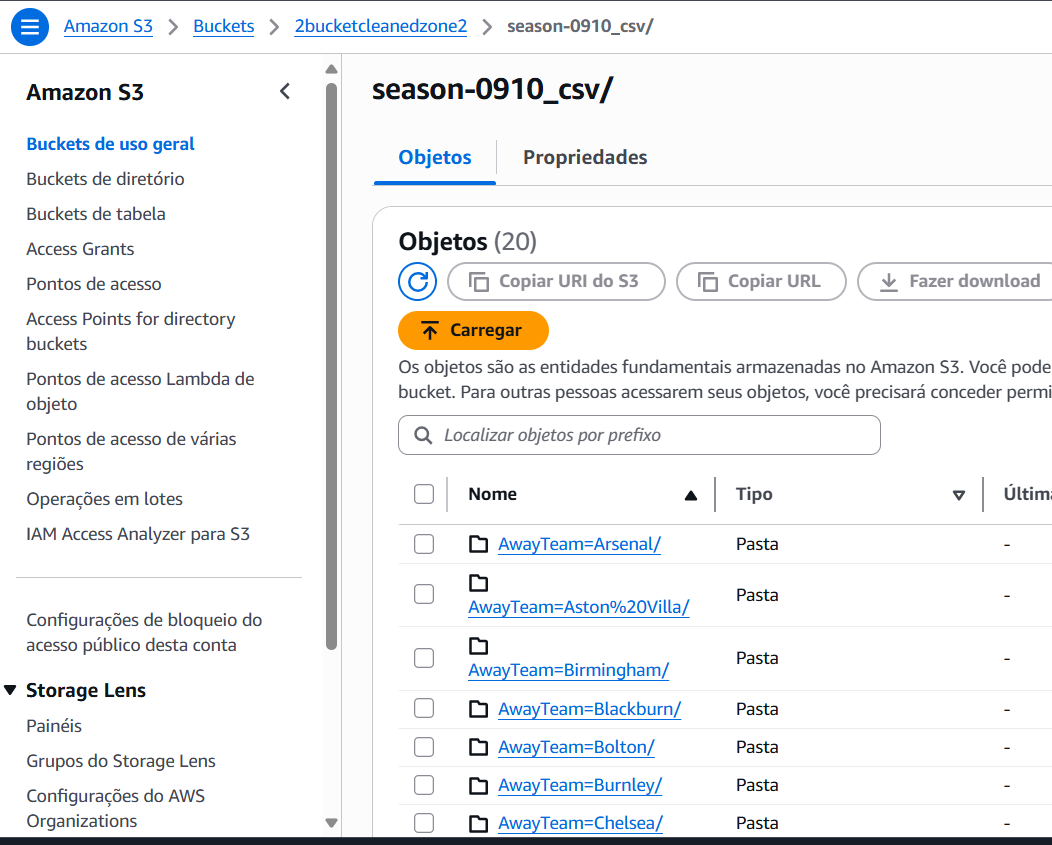

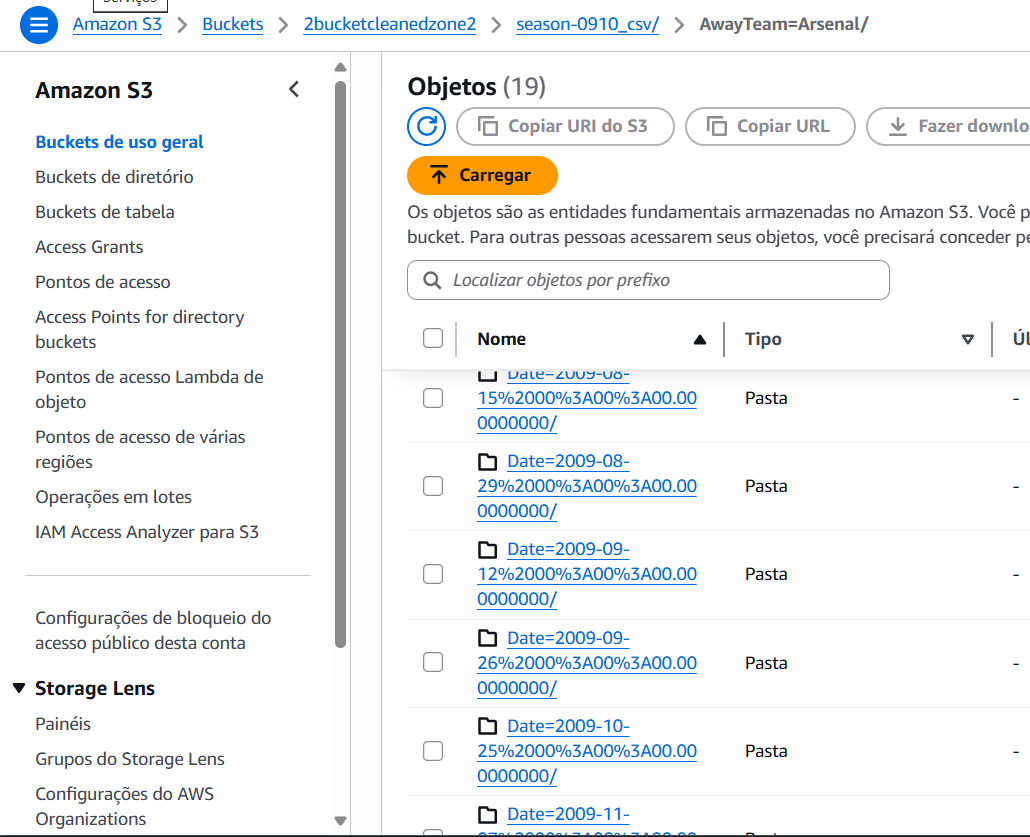

Como a tabela do terceiro bucket necessitarão das seguintes informações: nome do equipe, temporada, gols realizados, gols sofridos, partidas na temporada, média de gols por partida, média de gols por partida dentro de casa, média de gols por partida como visitante, bastou deixar as seguintes colunas: Date (data), nome da equipe (HomeTeam, AwayTeam), quantos gols fez (FTHG), quantos gols sofreu (FTAG) e excluir as demais. Depois as colunas Date foram convertidas para DateTime e os dados foram salvos como parquet. Por fim, os dados de cada arquivo foram particionados por equipe visitante e por data da partida.


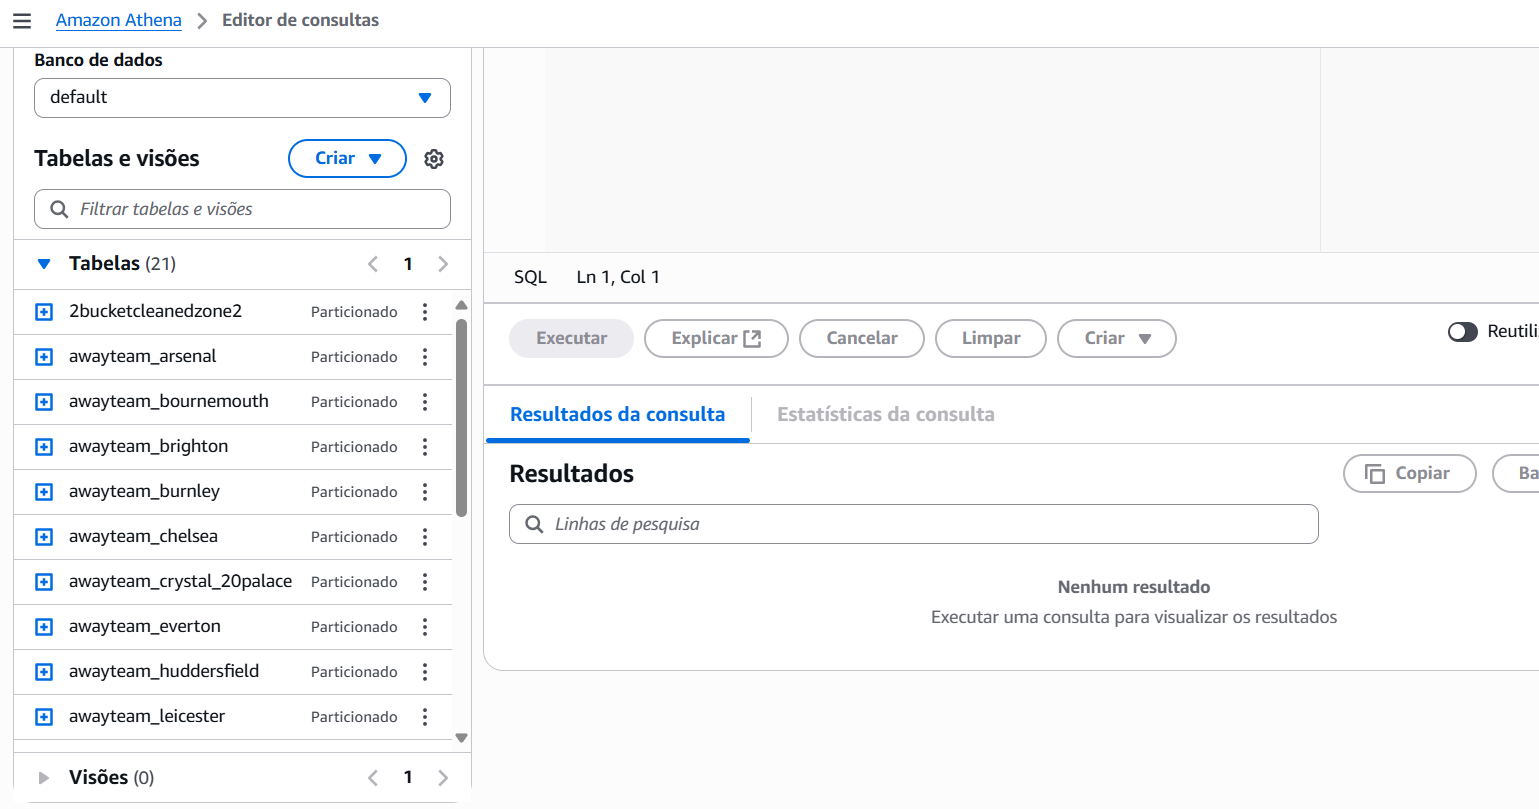

# **5. Terceiro Bucket**

Algumas colunas foram criadas para determinar a temporada, a media de Gols por partida, a média de gols por partida dentro de casa e a média de gols por partida como visitante. As demais foram reformuladas com os nomes das questões.

In [ ]:
import pandas as pd
import os

# Lista de arquivos e extração da temporada com base no nome
arquivos = [
    'season-0910_csv.csv',
    'season-1011_csv.csv',
    'season-1112_csv.csv',
    'season-1213_csv.csv',
    'season-1314_csv.csv',
    'season-1415_csv.csv',
    'season-1516_csv.csv',
    'season-1617_csv.csv',
    'season-1718_csv.csv',
    'season-1819_csv.csv'
]

df_lista = []

for arquivo in arquivos:
    # Extrair temporada do nome do arquivo: '0910' → '2009-2010'
    codigo = arquivo.split('-')[1][:4]
    ano_inicio = '20' + codigo[:2]
    ano_fim = '20' + codigo[2:]
    temporada = f'{ano_inicio}-{ano_fim}'

    df = pd.read_csv(arquivo)

    # Manter colunas relevantes
    df = df[['HomeTeam', 'FTHG', 'FTAG', 'AwayTeam', 'Date']]
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df = df.dropna(subset=['Date'])

    # Criar DataFrame do time mandante
    mandante = df[['HomeTeam', 'FTHG', 'FTAG']].copy()
    mandante.rename(columns={
        'HomeTeam': 'Equipe',
        'FTHG': 'GolsFeitos',
        'FTAG': 'GolsSofridos'
    }, inplace=True)
    mandante['Local'] = 'Casa'
    mandante['temporada'] = temporada
    mandante['Partida'] = 1

    # Criar DataFrame do time visitante
    visitante = df[['AwayTeam', 'FTAG', 'FTHG']].copy()
    visitante.rename(columns={
        'AwayTeam': 'Equipe',
        'FTAG': 'GolsFeitos',
        'FTHG': 'GolsSofridos'
    }, inplace=True)
    visitante['Local'] = 'Fora'
    visitante['temporada'] = temporada
    visitante['Partida'] = 1

    # Juntar os dois DataFrames
    df_temp = pd.concat([mandante, visitante], ignore_index=True)
    df_lista.append(df_temp)

# Unir todos os dados de todas as temporadas
df_tudo = pd.concat(df_lista, ignore_index=True)

# Agrupamento principal
agg_total = df_tudo.groupby(['Equipe', 'temporada']).agg({
    'Partida': 'sum',
    'GolsFeitos': 'sum',
    'GolsSofridos': 'sum'
}).reset_index()

agg_total['MediaGolsPartida'] = (agg_total['GolsFeitos'] / agg_total['Partida']).round(2)

# Agrupamento por local (mandante/visitante)
agg_local = df_tudo.groupby(['Equipe', 'temporada', 'Local']).agg({
    'GolsFeitos': 'sum',
    'Partida': 'sum'
}).reset_index()

# Pivotar Casa/Fora
pivot = agg_local.pivot(index=['Equipe', 'temporada'], columns='Local', values=['GolsFeitos', 'Partida'])
pivot.columns = ['GolsCasa', 'GolsFora', 'PartidasCasa', 'PartidasFora']
pivot = pivot.reset_index()

# Calcular médias separadas
pivot['MediaGolsCasa'] = (pivot['GolsCasa'] / pivot['PartidasCasa']).round(2)
pivot['MediaGolsVisitante'] = (pivot['GolsFora'] / pivot['PartidasFora']).round(2)

# Unir tudo
df_final = pd.merge(agg_total, pivot[['Equipe', 'temporada', 'MediaGolsCasa', 'MediaGolsVisitante']], on=['Equipe', 'temporada'])

# Exibir exemplo
print(df_final.head())


    Equipe  temporada  Partida  GolsFeitos  GolsSofridos  MediaGolsPartida  \
0  Arsenal  2009-2010       38          83            41              2.18   
1  Arsenal  2010-2011       38          72            43              1.89   
2  Arsenal  2011-2012       38          74            49              1.95   
3  Arsenal  2012-2013       38          72            37              1.89   
4  Arsenal  2013-2014       38          68            41              1.79   

   MediaGolsCasa  MediaGolsVisitante  
0           2.53                1.84  
1           1.74                2.05  
2           2.05                1.84  
3           2.47                1.32  
4           1.89                1.68  


<ipython-input-28-dcdc99d40faf>:31: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-28-dcdc99d40faf>:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-28-dcdc99d40faf>:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-28-dcdc99d40faf>:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure

In [ ]:
df_final.to_parquet(
    'curated-zone-parquet/',
    index=False,
    partition_cols=['Equipe']
)


In [ ]:
import shutil

# Compactar a pasta inteira em um arquivo zip
shutil.make_archive("curated-zone-parquet", 'zip', "curated-zone-parquet")

# Permitir download
from google.colab import files
files.download("curated-zone-parquet.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**2 opção com aws glue job (Script)**

In [ ]:
import sys
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from pyspark.sql.functions import col, lit, substring, concat_ws, sum as _sum, count as _count, round as _round, input_file_name, regexp_extract

sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session

# Caminhos (ajuste para seus buckets!)
input_path = "s3://meu-bucket-landing-zone/"
https://us-east-2.console.aws.amazon.com/s3/buckets/2bucketcleanedzone2?region=us-east-2
output_path = "s3://meu-bucket-curated-zone/"

# Lê todos os CSVs da landing zone
df = spark.read.option("header", True).csv(input_path)

# Converte data
df = df.withColumn("Date", col("Date").cast("date"))

# Extrai código da temporada do nome do arquivo
df = df.withColumn("source_file", input_file_name())
df = df.withColumn("season_code", regexp_extract("source_file", "season-(\\d{4})", 1))
df = df.withColumn("temporada",
                   concat_ws("-",
                             lit("20") + substring("season_code", 1, 2),
                             lit("20") + substring("season_code", 3, 2)))

# Mandante
mandante = df.select(
    col("HomeTeam").alias("Equipe"),
    col("FTHG").cast("int").alias("GolsFeitos"),
    col("FTAG").cast("int").alias("GolsSofridos"),
    col("temporada"),
    lit("Casa").alias("Local")
)

# Visitante
visitante = df.select(
    col("AwayTeam").alias("Equipe"),
    col("FTAG").cast("int").alias("GolsFeitos"),
    col("FTHG").cast("int").alias("GolsSofridos"),
    col("temporada"),
    lit("Fora").alias("Local")
)

# Juntar tudo
jogos = mandante.unionByName(visitante).withColumn("Partida", lit(1))

# Agregação total
agg_total = jogos.groupBy("Equipe", "temporada").agg(
    _sum("GolsFeitos").alias("GolsFeitos"),
    _sum("GolsSofridos").alias("GolsSofridos"),
    _count("Partida").alias("Partida")
).withColumn("MediaGolsPartida", _round(col("GolsFeitos") / col("Partida"), 2))

# Agregação por casa/fora
agg_local = jogos.groupBy("Equipe", "temporada", "Local").agg(
    _sum("GolsFeitos").alias("GolsLocal"),
    _count("Partida").alias("PartidasLocal")
)

# Pivot
pivoted = agg_local.groupBy("Equipe", "temporada").pivot("Local").agg(
    _sum("GolsLocal").alias("gols"),
    _sum("PartidasLocal").alias("partidas")
)

pivoted = pivoted.withColumnRenamed("Casa_gols", "GolsCasa") \
                 .withColumnRenamed("Casa_partidas", "PartidasCasa") \
                 .withColumnRenamed("Fora_gols", "GolsFora") \
                 .withColumnRenamed("Fora_partidas", "PartidasFora")

pivoted = pivoted.withColumn("MediaGolsCasa", _round(col("GolsCasa") / col("PartidasCasa"), 2)) \
                 .withColumn("MediaGolsVisitante", _round(col("GolsFora") / col("PartidasFora"), 2))

# Junta total + pivot
df_final = agg_total.join(pivoted, on=["Equipe", "temporada"], how="left")

# Escreve no bucket curated zone, particionado por Equipe
df_final.write.mode("overwrite").partitionBy("Equipe").parquet(output_path)


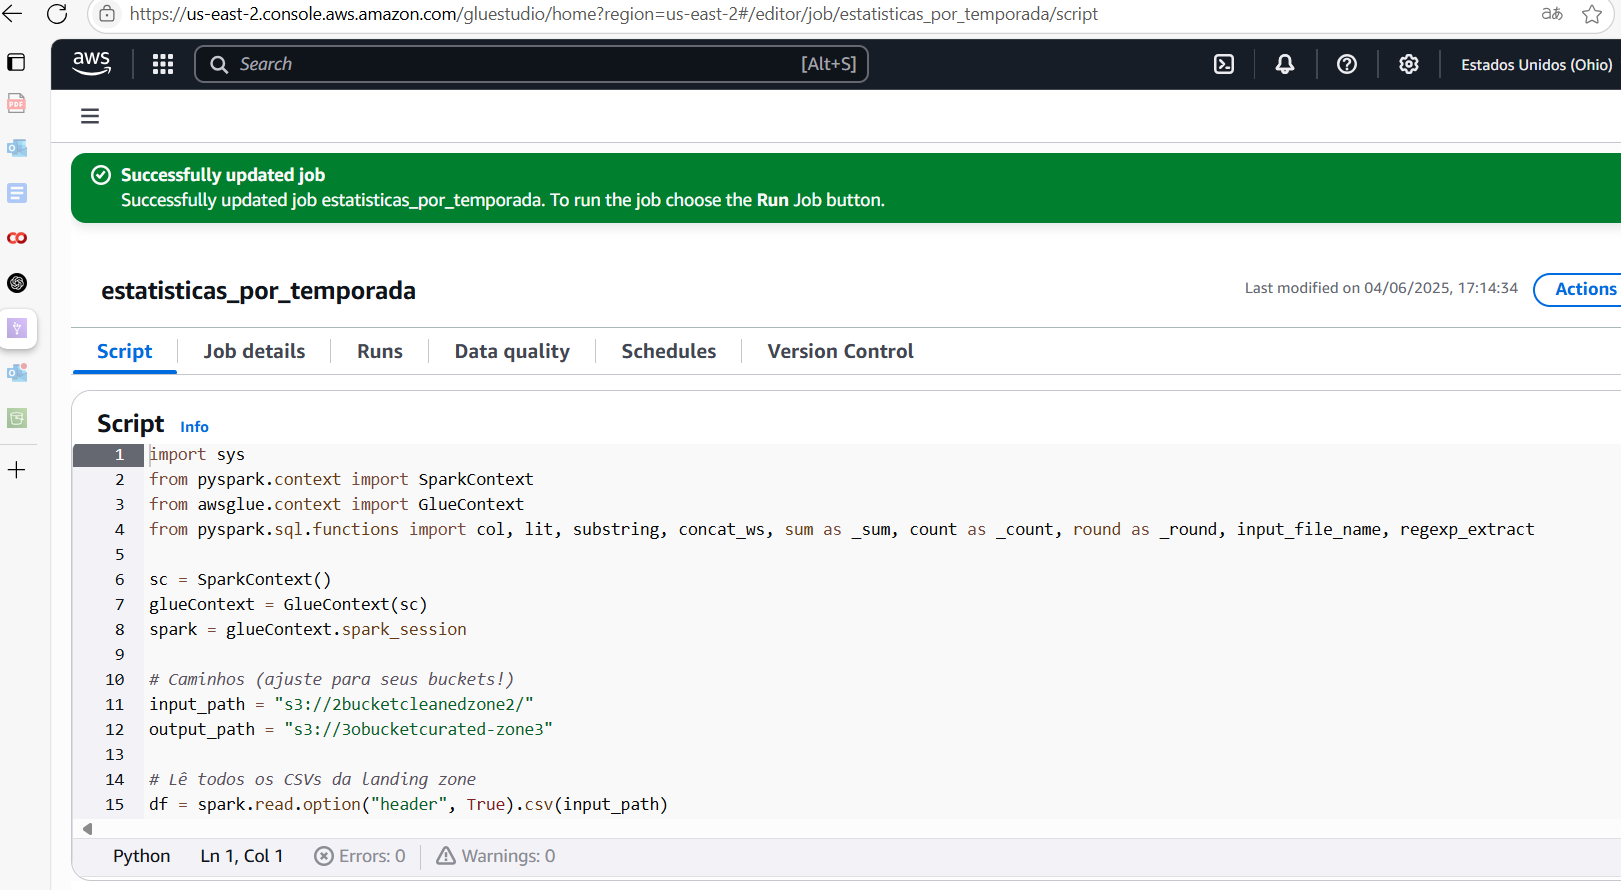

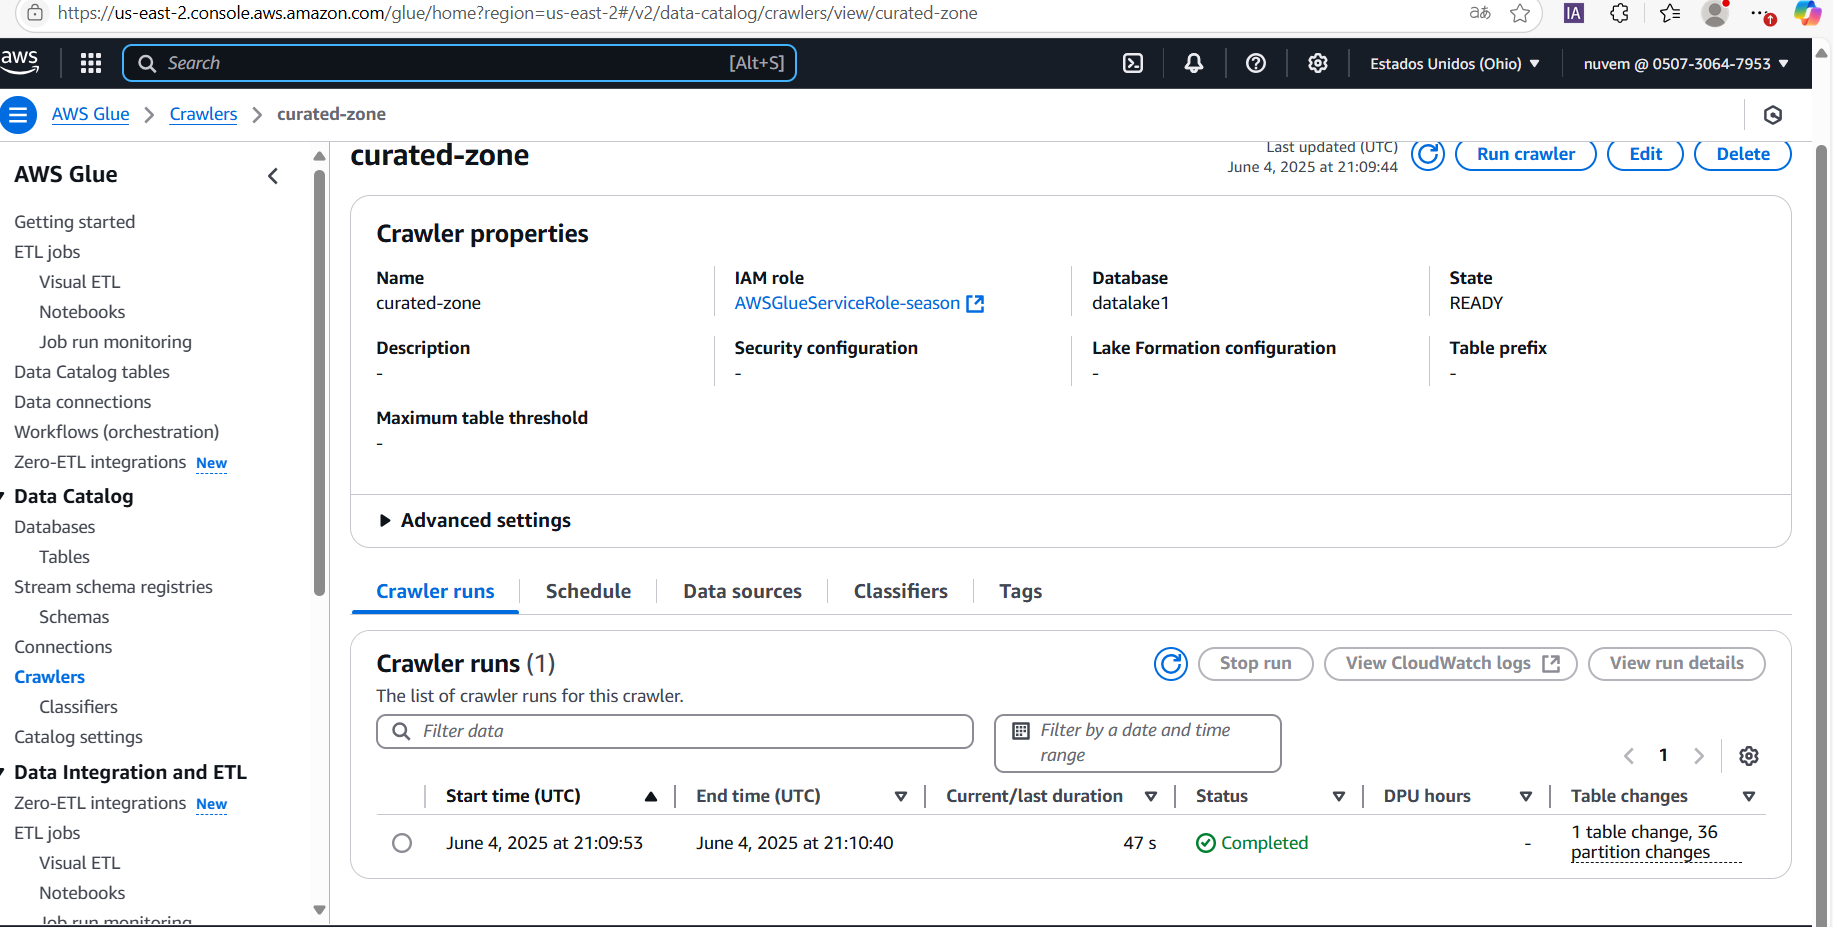

# **Athena**

**Responda às seguintes perguntas com Amazon Athena (Todas para as 10 temporadas:**

1.Qual camada é mais adequada para cada uma das perguntas?

2.Qual equipe fez mais gols?

3.Qual equipe sofreu mais gols?

4.Qual a média de gols por partida do Manchester United?

5. Qual a média de gols sofridos pelo Liverpool?

6.Qual é a pior defesa da Premier League ?

7. Qual é o melhor ataque da Premier League?

8. Qual é o melhor ataque de cada temporada?

**Primeira Pergunta:**

2. Qual equipe fez mais gols?

Curated-zone.Já contém total de gols por equipe, por temporada.

3. Qual equipe sofreu mais gols?

curated-zone	Campo GolsSofridos já calculado por equipe.

4. Qual a média de gols por partida do Manchester United?

curated-zone	Campo MediaGolsPartida pronto por equipe.

5. Qual a média de gols sofridos pelo Liverpool?

curated-zone	Campo GolsSofridos / Partida pode ser consultado diretamente.

6. Qual é a pior defesa da Premier League?

curated-zone	"Pior defesa" = mais gols sofridos → usar GolsSofridos

7. Qual é o melhor ataque da Premier League?

curated-zone	"Melhor ataque" = mais gols feitos → usar GolsFeitos

8. Qual é o melhor ataque de cada temporada?
curated-zone	Agrupar por temporada e filtrar maior GolsFeitos por grupo

In [ ]:
#2 Questão - Qual equipe fez mais gols?#
SELECT Equipe, SUM(GolsFeitos) AS TotalGols
FROM "curated-zone"."tabela_estatisticas"
GROUP BY Equipe
ORDER BY TotalGols DESC
LIMIT 1;

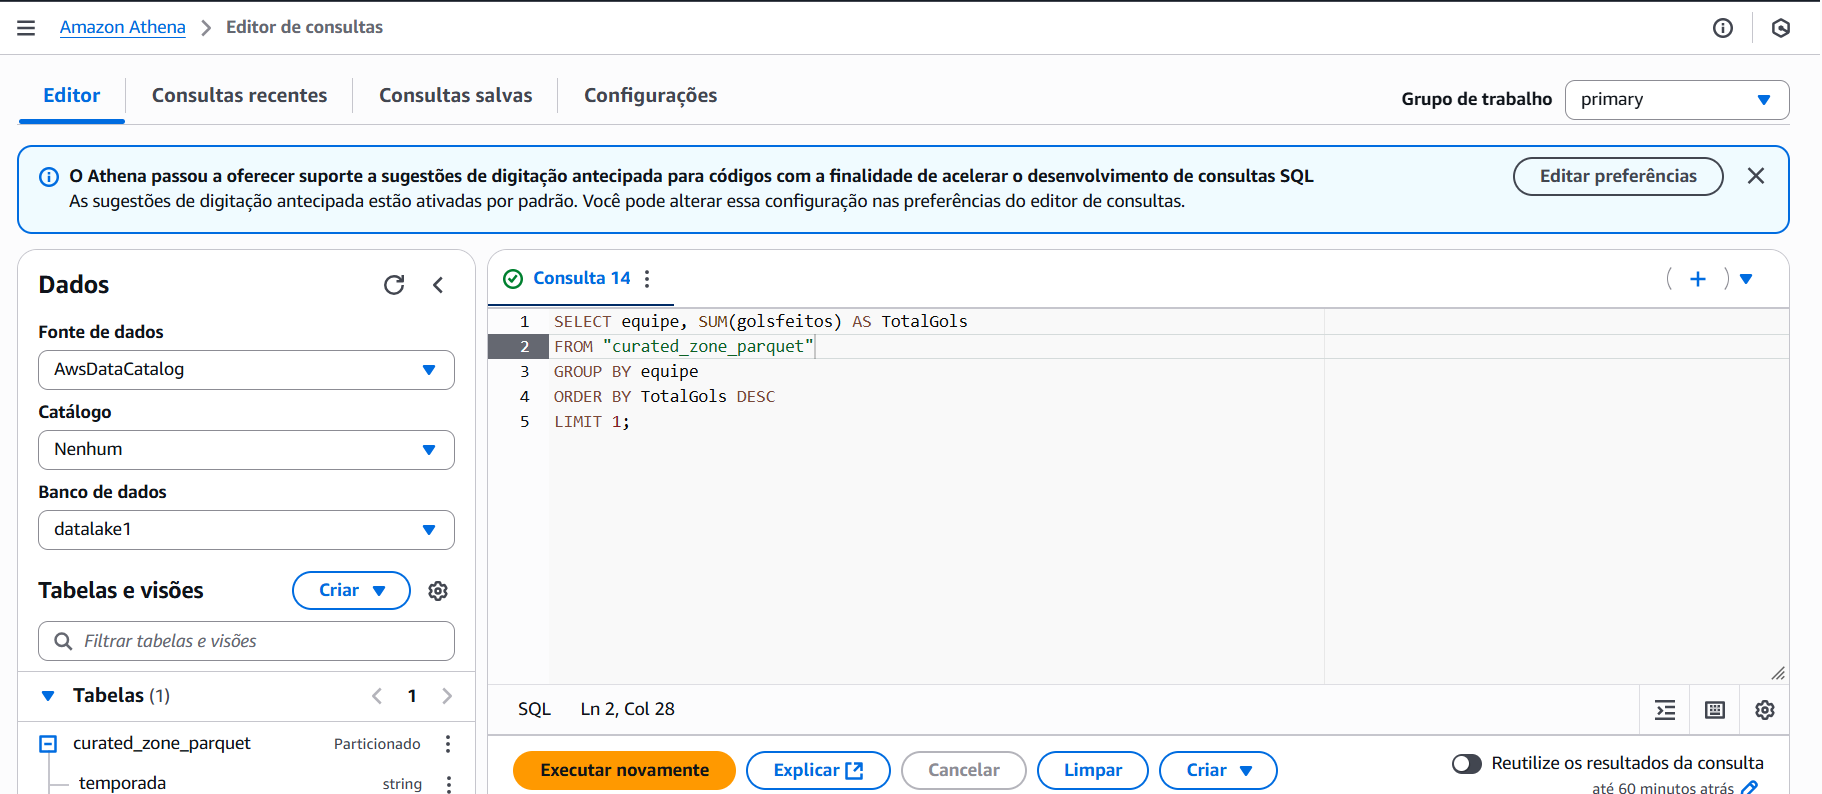

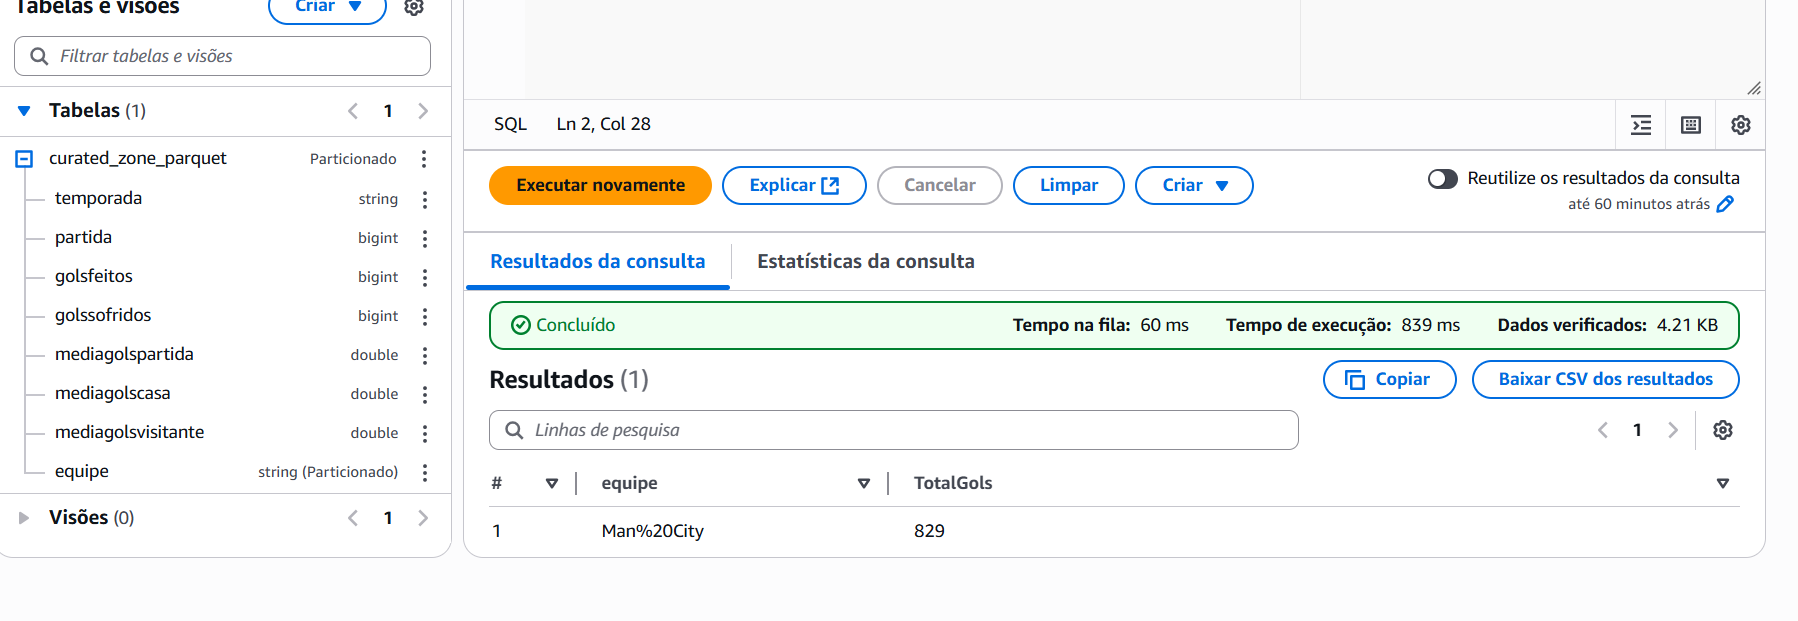

In [ ]:
#3. Qual equipe sofreu mais gols?#
SELECT Equipe, SUM(GolsSofridos) AS TotalSofridos
FROM "curated-zone"."tabela_estatisticas"
GROUP BY Equipe
ORDER BY TotalSofridos DESC
LIMIT 1;

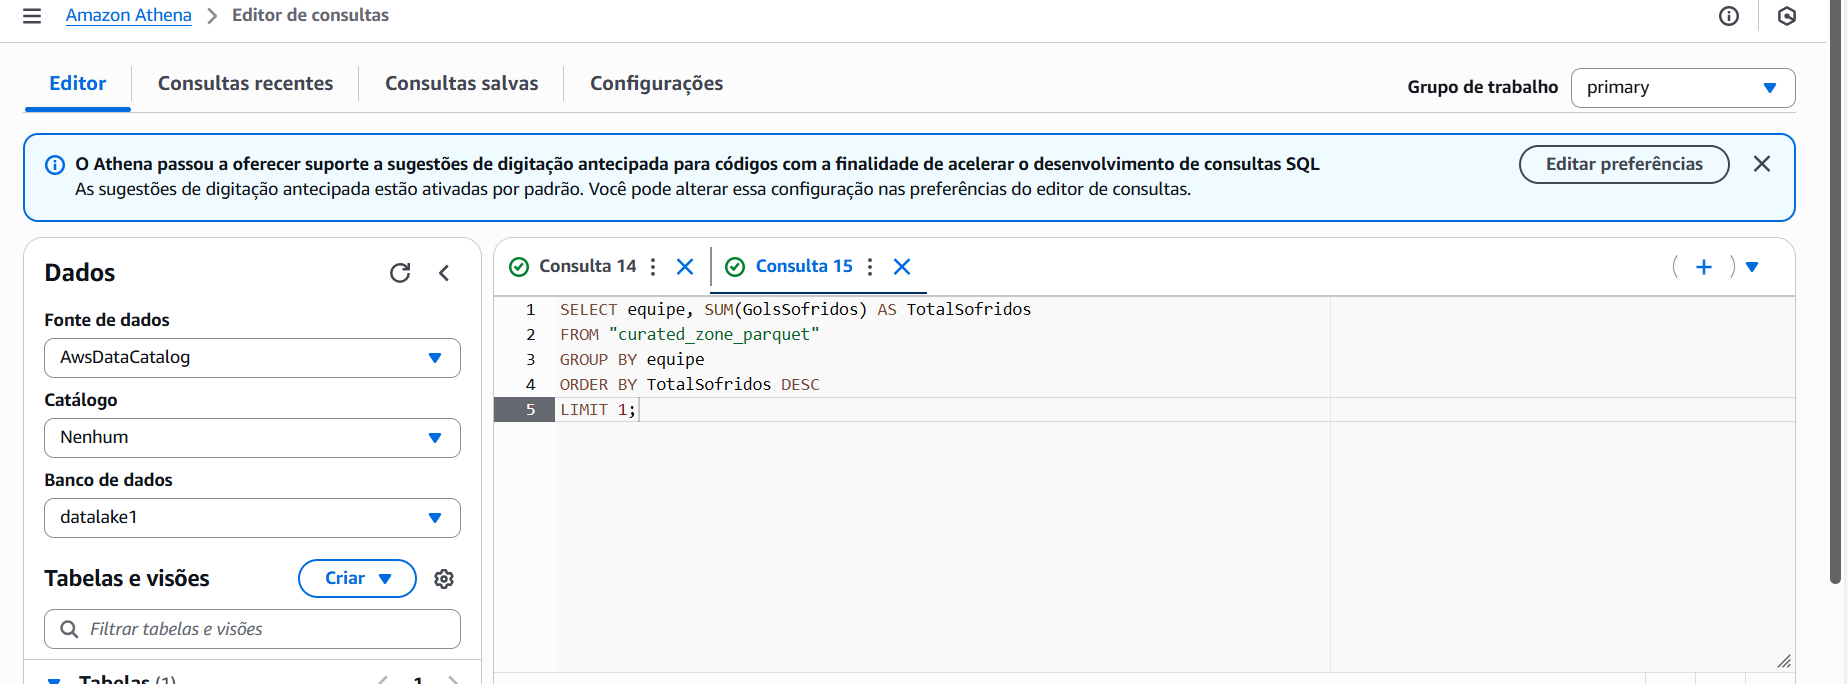

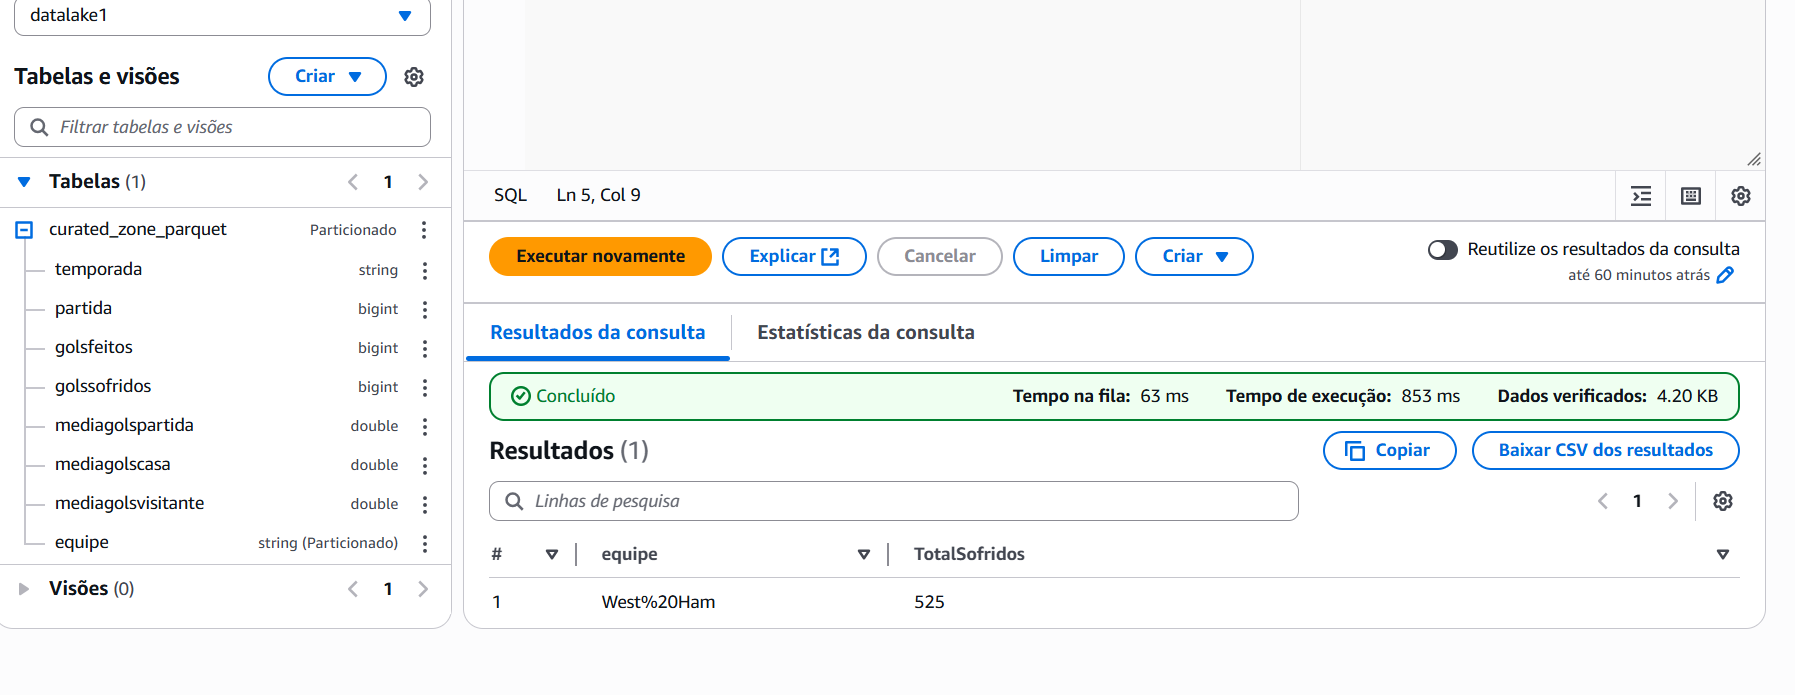

In [ ]:
# 4. Qual a média de gols por partida do Manchester United? #
SELECT AVG(MediaGolsPartida) AS MediaGols
FROM "curated-zone"."tabela_estatisticas"
WHERE Equipe = 'Manchester United';

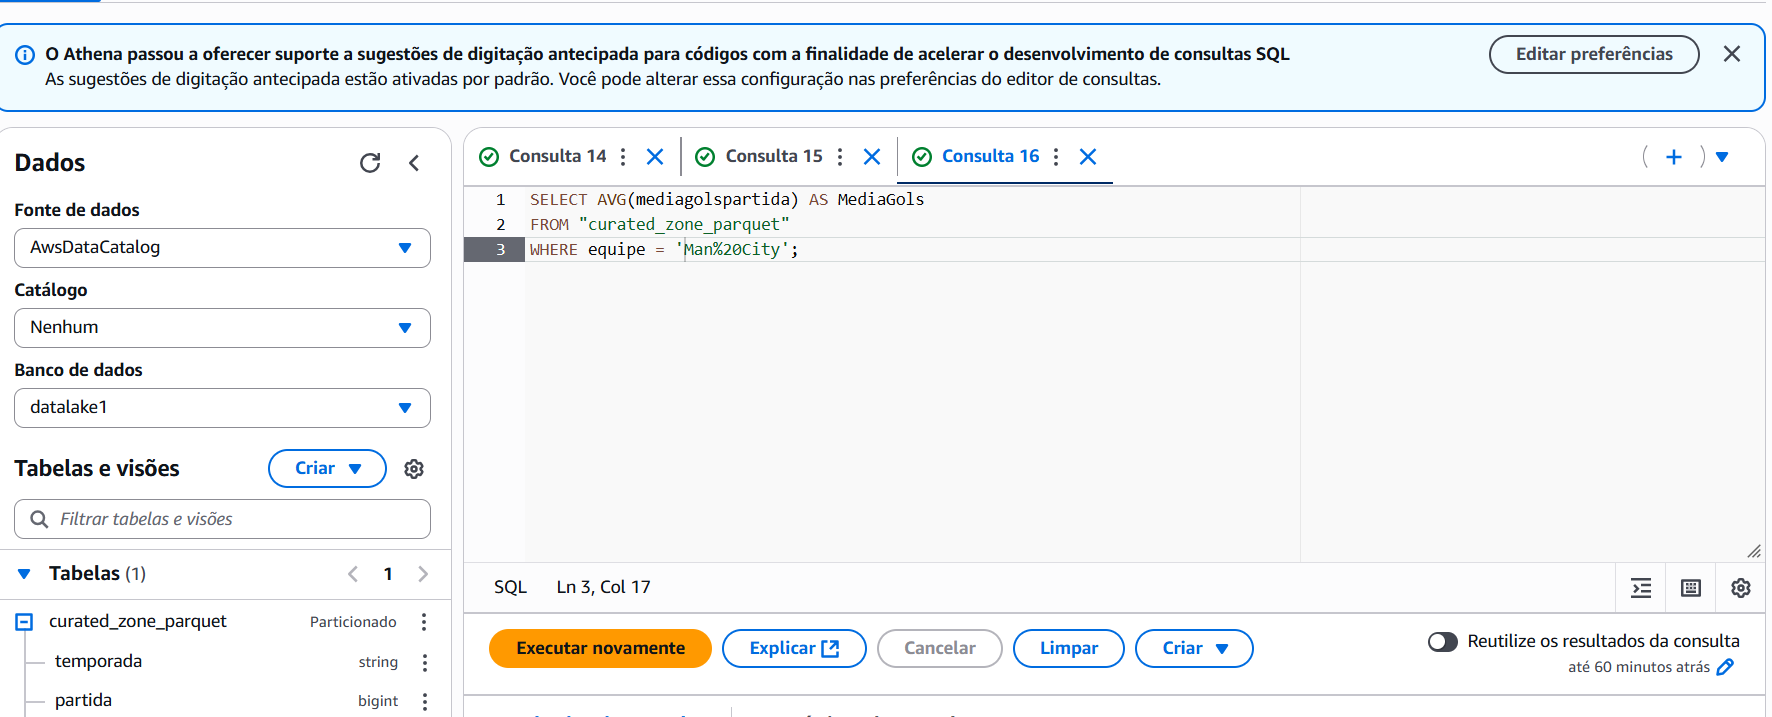

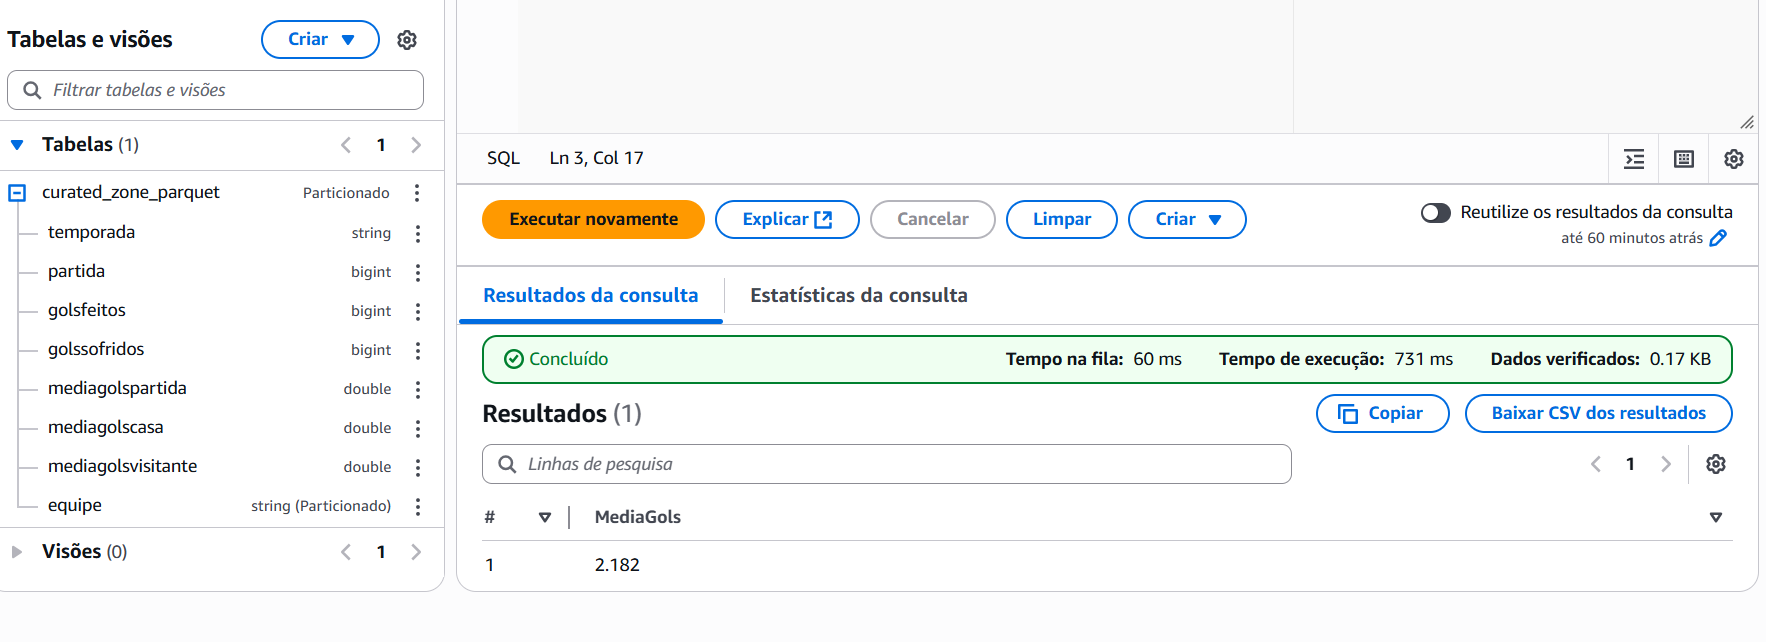

In [ ]:
# 5.Qual a média de gols sofridos pelo Liverpool?
 SELECT SUM(GolsSofridos) / SUM(Partida) AS MediaSofridos
FROM "curated-zone"."tabela_estatisticas"
WHERE Equipe = 'Liverpool';

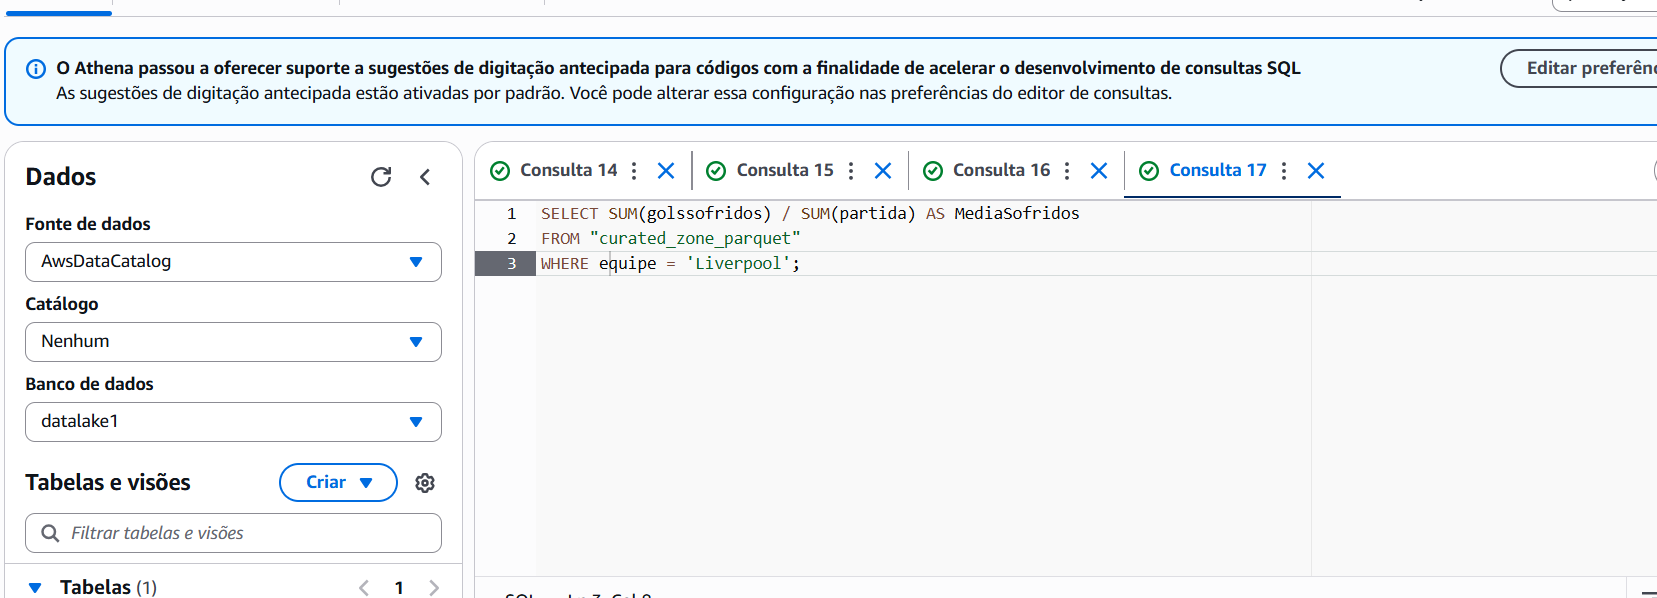

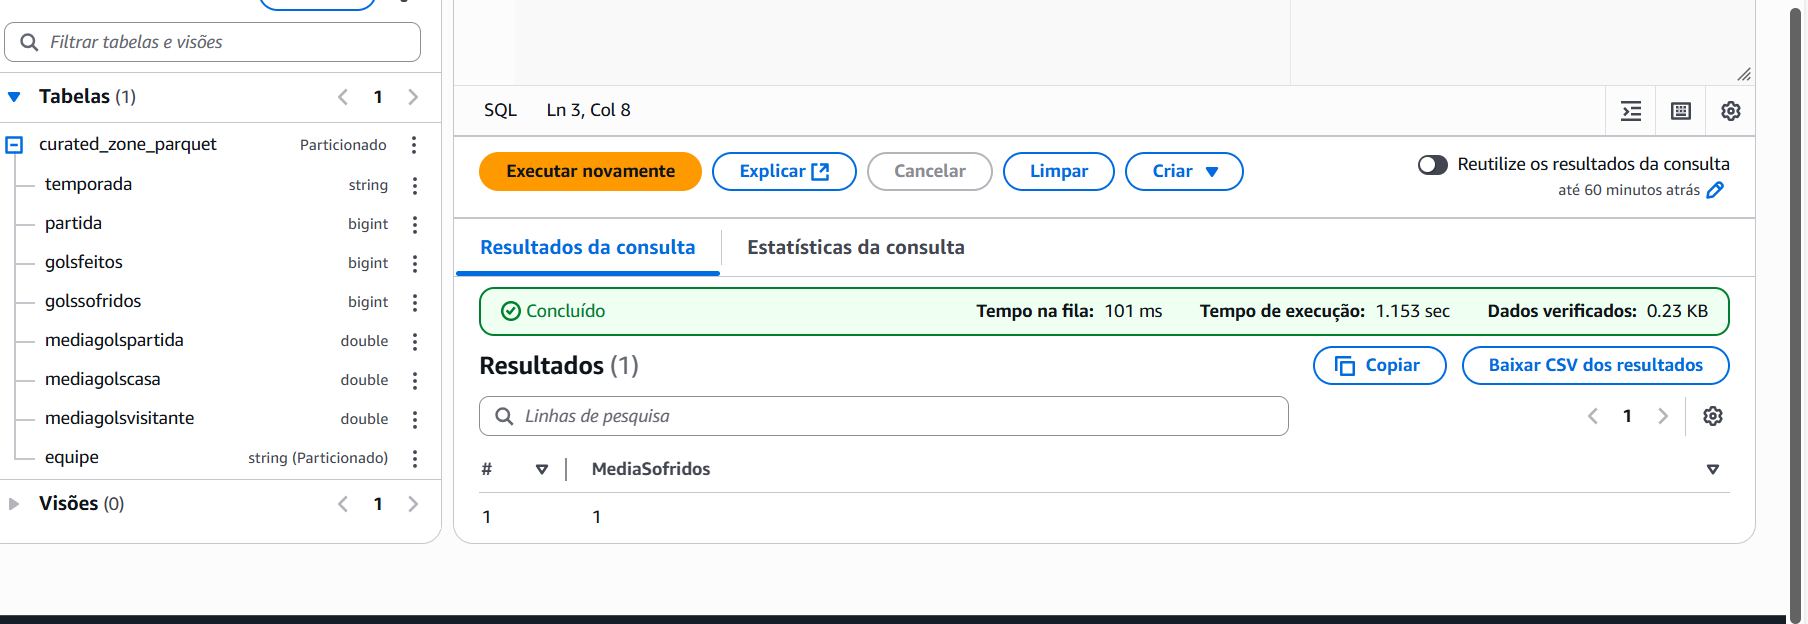

In [ ]:
6.Qual é a pior defesa da Premier League?
SELECT Equipe, SUM(GolsSofridos) AS TotalSofridos
FROM "curated-zone"."tabela_estatisticas"
GROUP BY Equipe
ORDER BY TotalSofridos DESC
LIMIT 1;

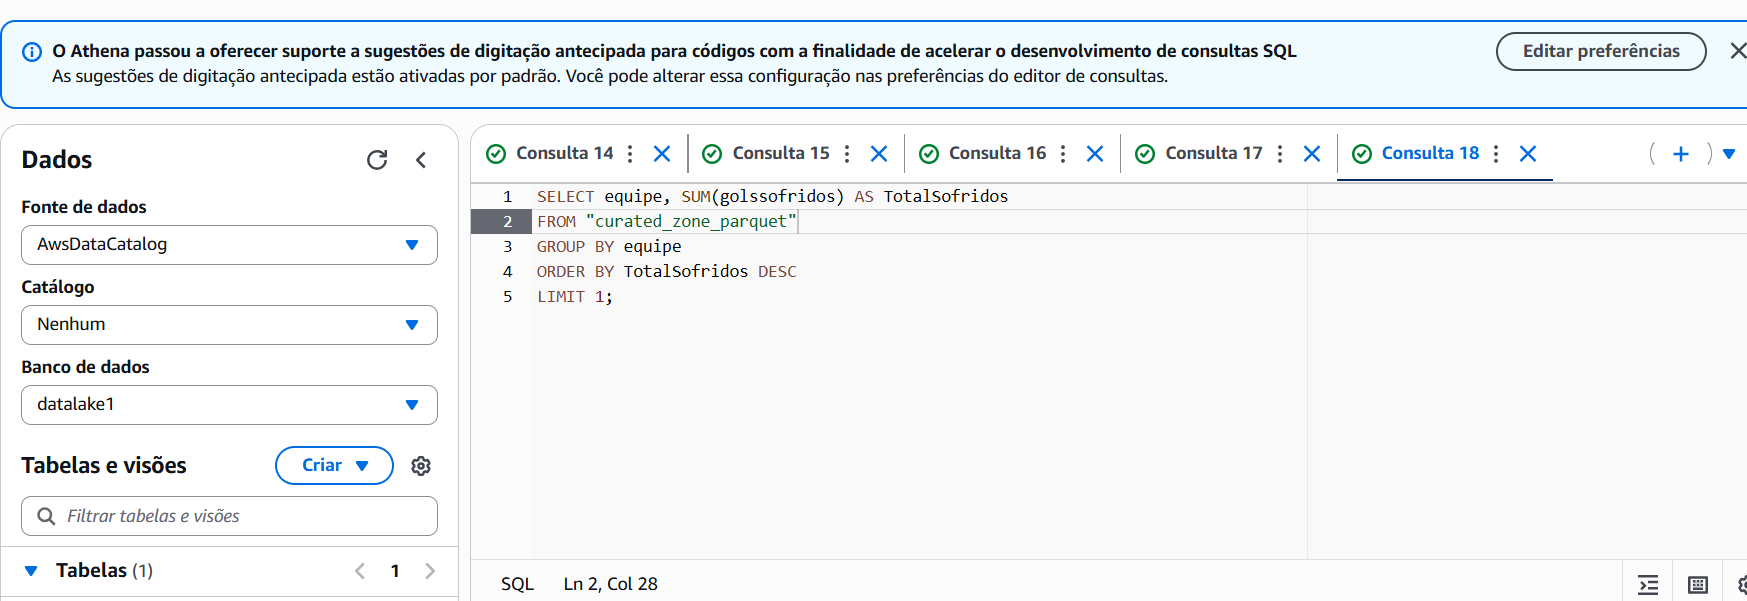

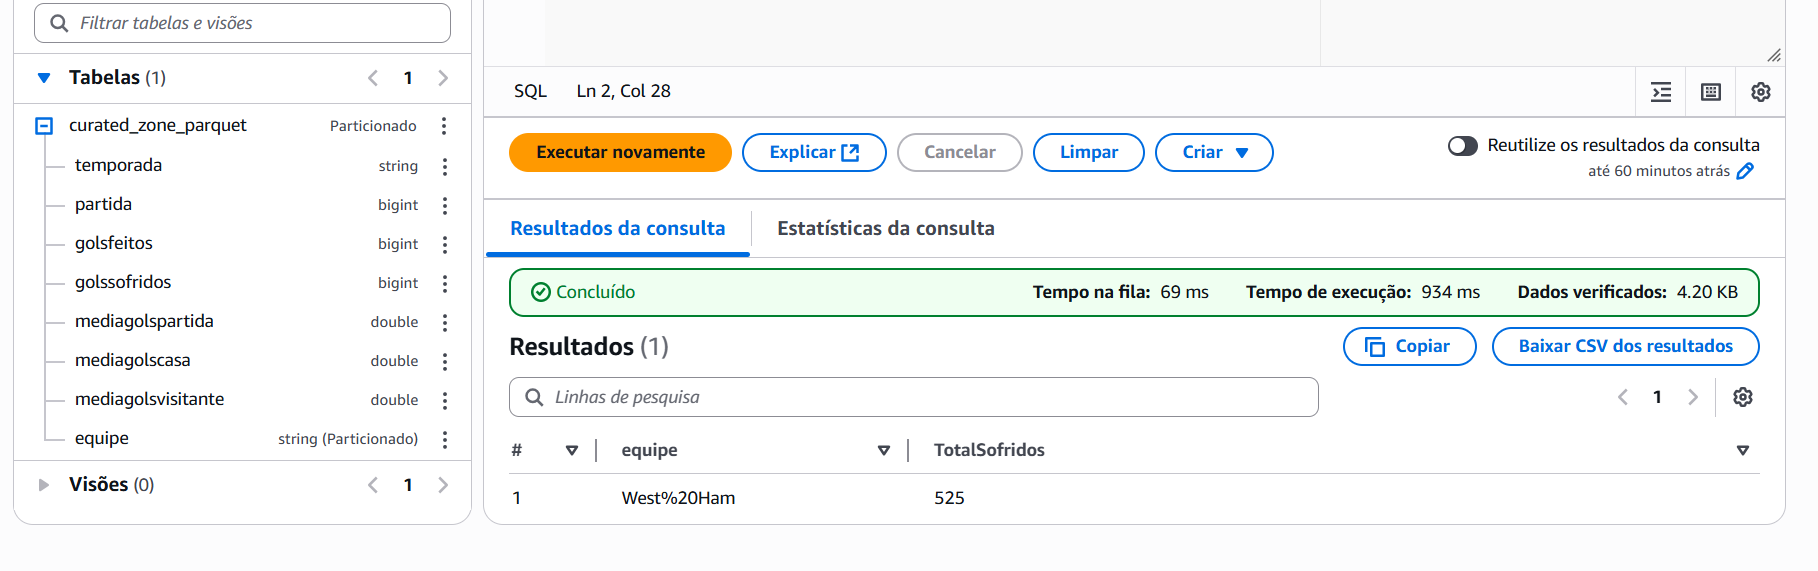

In [ ]:
7. Qual é o melhor ataque da Premier League?
SELECT Equipe, SUM(GolsFeitos) AS TotalGols
FROM "curated-zone"."tabela_estatisticas"
GROUP BY Equipe
ORDER BY TotalGols DESC
LIMIT 1;

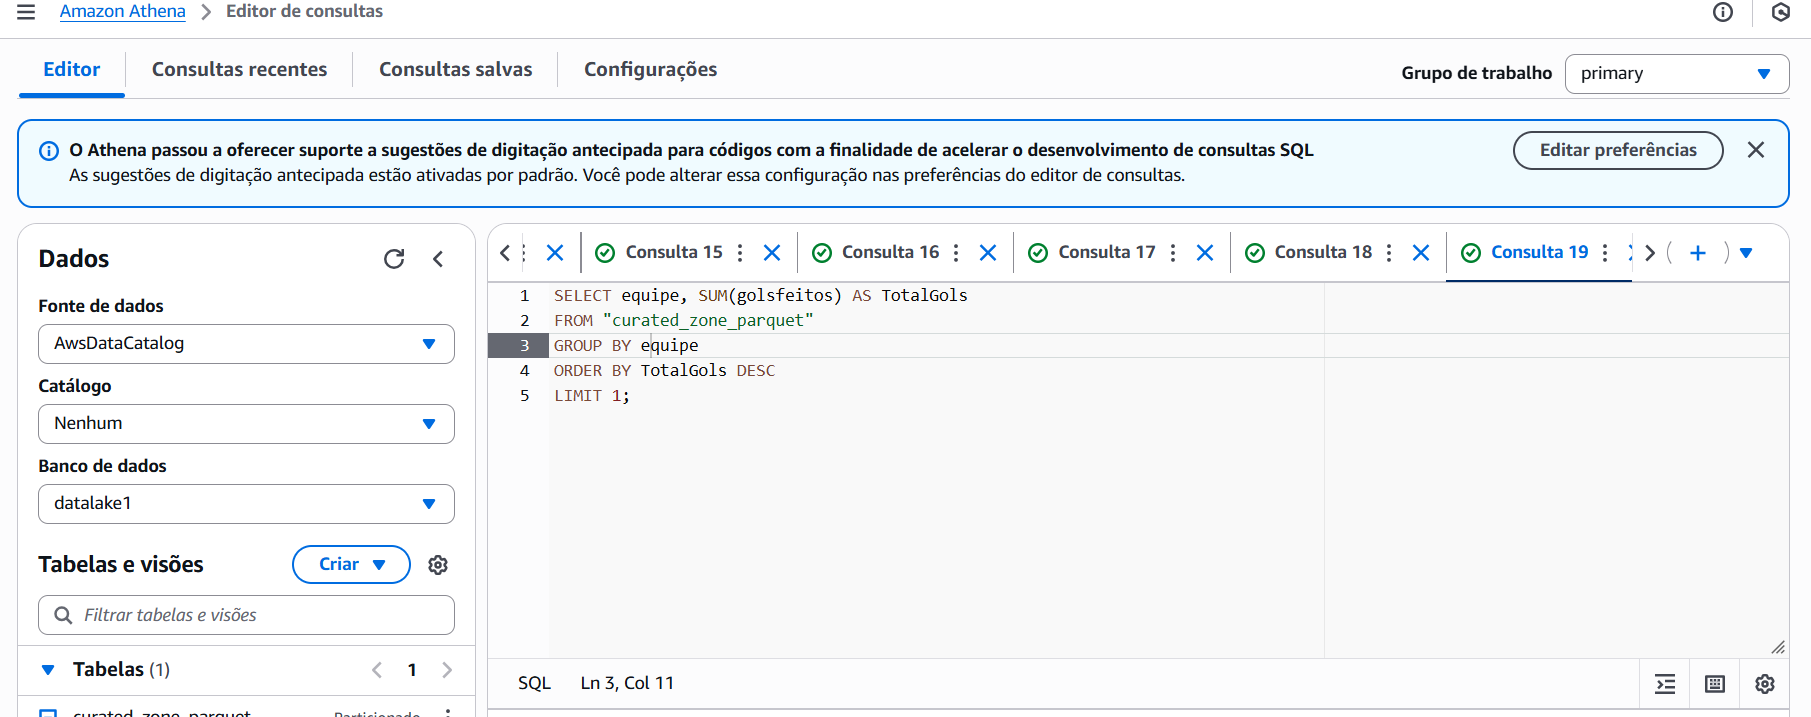

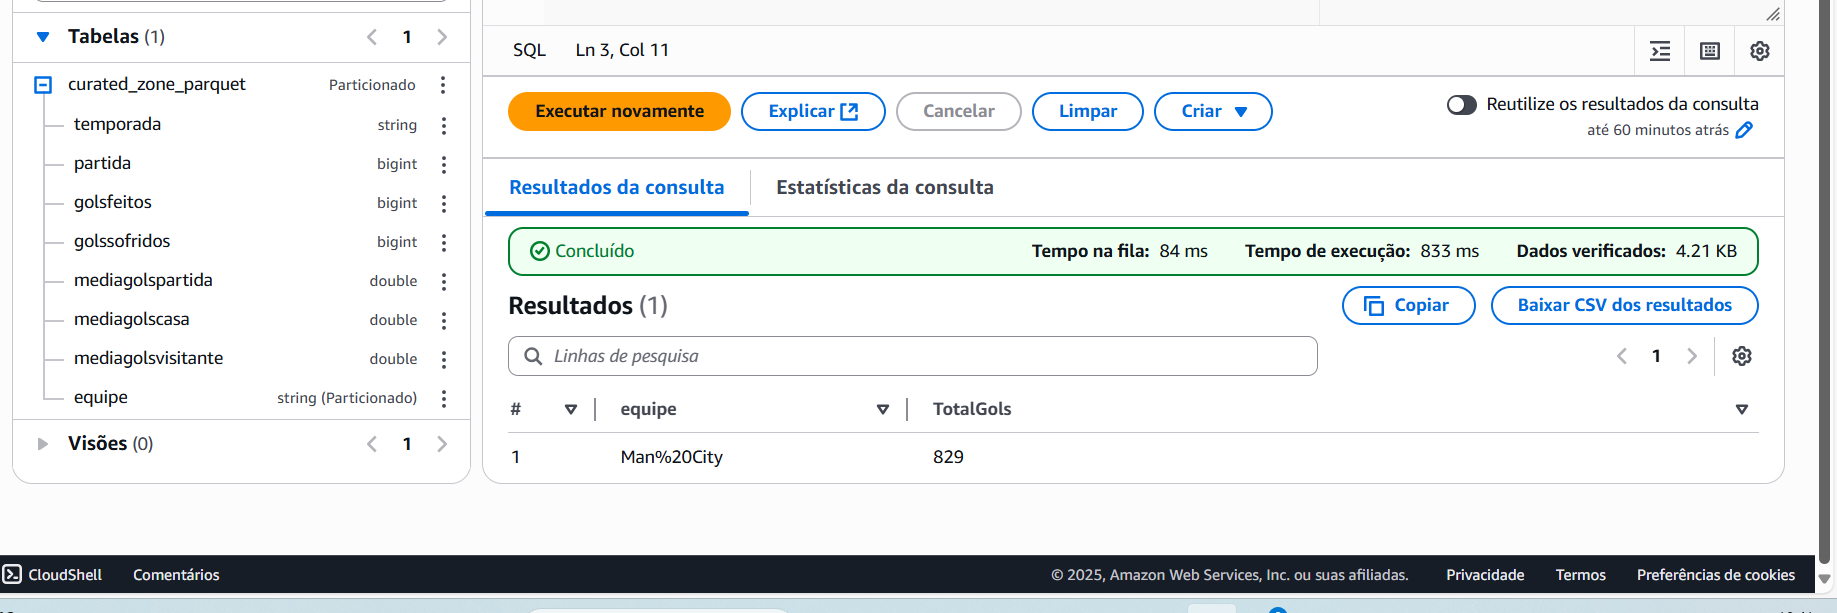

In [ ]:
8.Qual é o melhor ataque de cada temporada?
SELECT temporada, Equipe, GolsFeitos
FROM (
    SELECT temporada, Equipe, GolsFeitos,
           ROW_NUMBER() OVER (PARTITION BY temporada ORDER BY GolsFeitos DESC) AS rk
    FROM "curated-zone"."tabela_estatisticas"
) tmp
WHERE rk = 1;


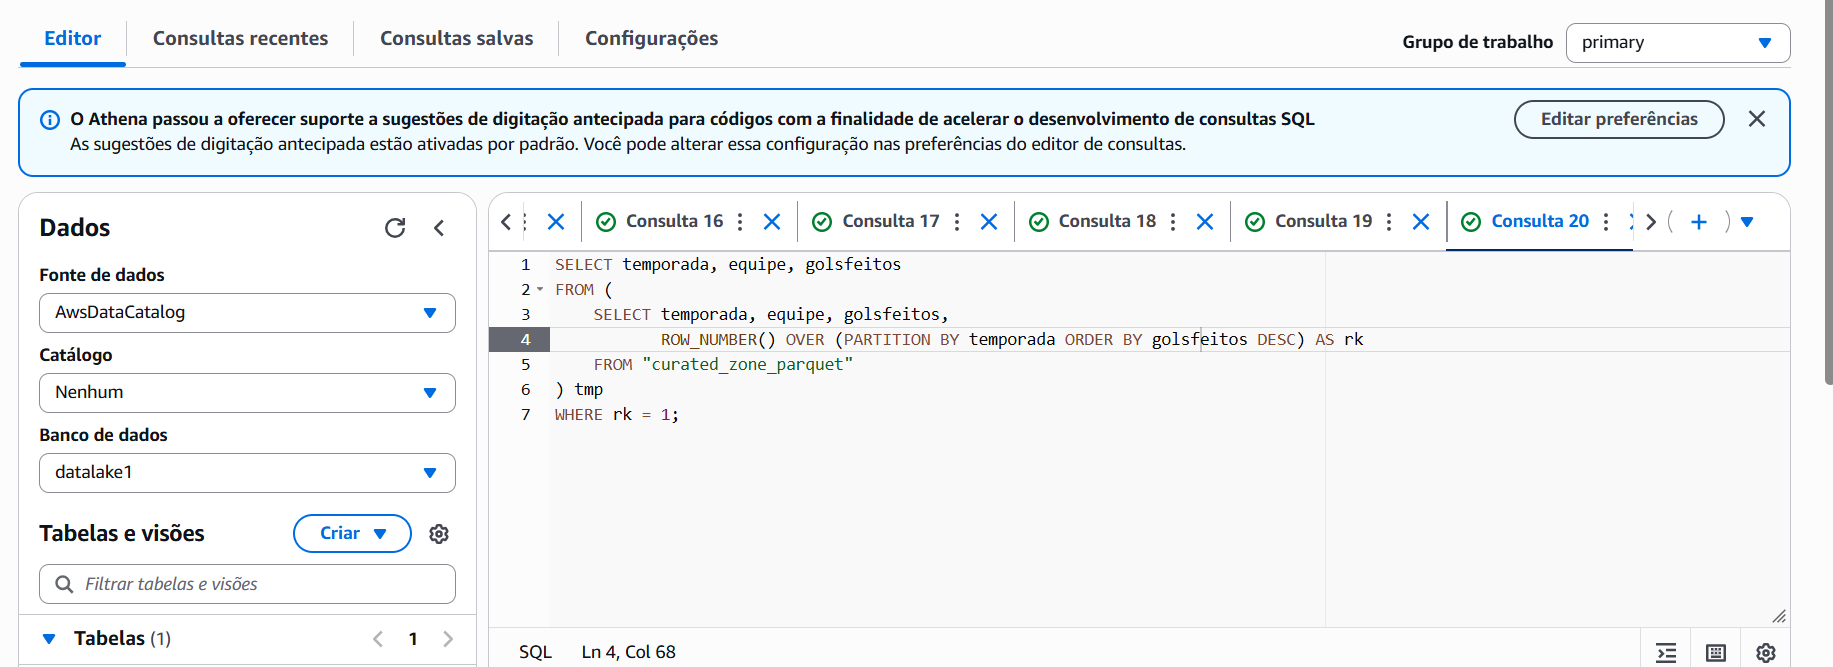

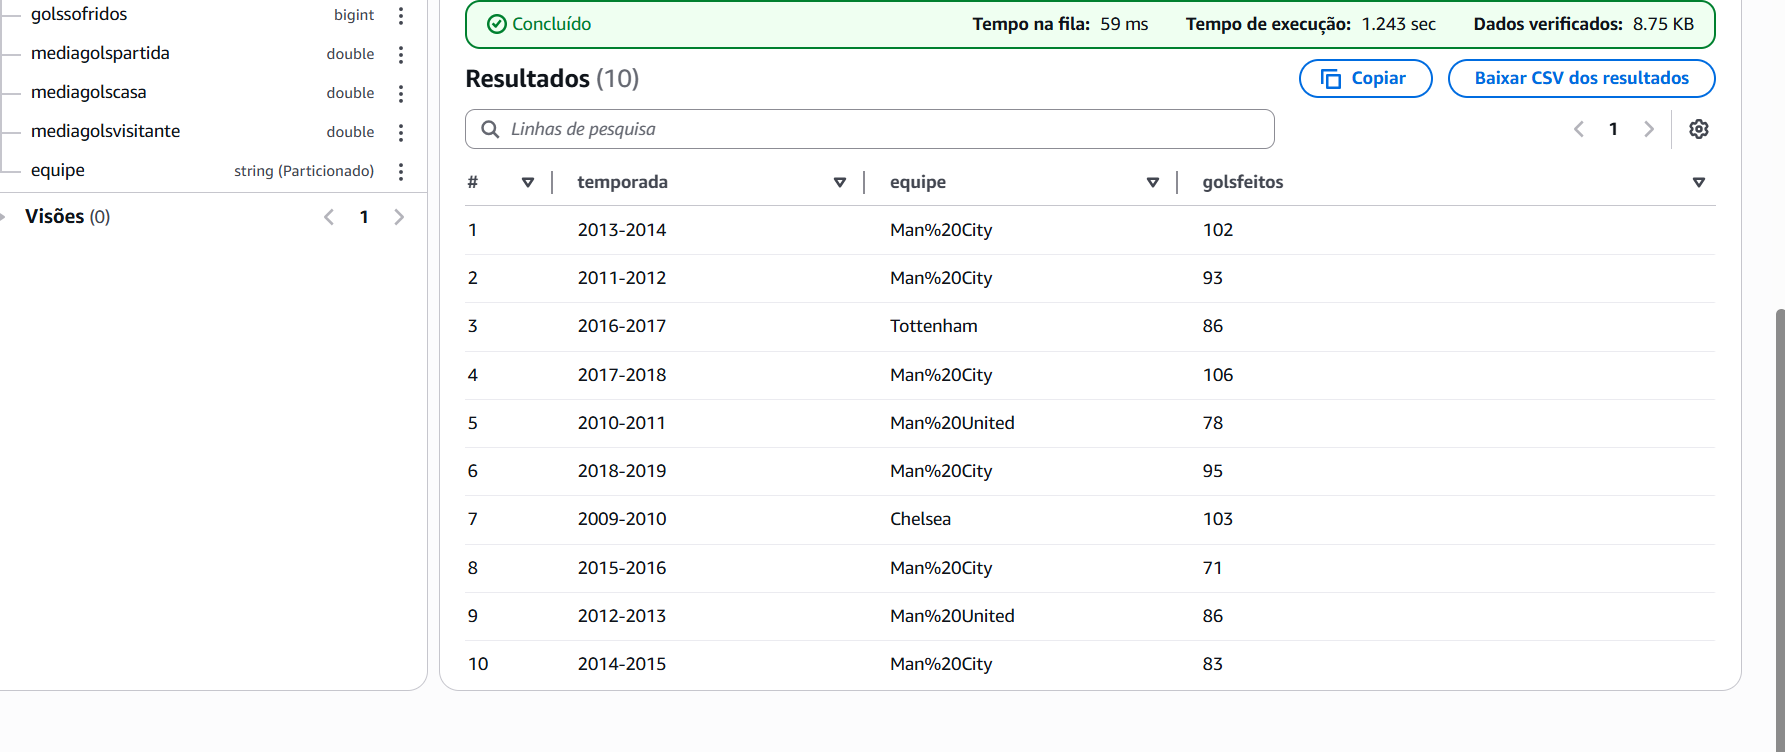